<a href="https://colab.research.google.com/github/cgrubio91/cgrubio91.github.io/blob/main/Data_analysis_Obra_Civil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISIS COSTOS OBRA CIVIL EN COLOMBIA**

Se realiza el analisis de los items de obra ejecutados bajo el control presupuestal del software MABPRO, esta información es suministrada por la empresa MABTEC, en la ejecución de proyectos de entidades públicas.

In [2]:
#1 Vamos a importar las librerias necesarias para el analisis inicial
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
#2 En este punto, vamos a hacer uso del ecosistema de Google, conectando nuestro .ipynb con Google Drive, e importar los datasets
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Lectura del archivo a revisar de items en nuestro Data Lake
df_items = pd.read_excel('/content/drive/MyDrive/IBERO/Especialización Big Data/Opción de grado/Data Lake/Actas_MABPRO.xlsx')

df_items.head(5)

,Id proyecto,ITEM,DESCRIPCIÓN,UNIDAD,CANT,VR. UNITARIO,VALOR,CANT.1,VALOR.1,CANT.2,VALOR.2,CANT.3,VALOR.3,CANT.4,VALOR.4,Unnamed: 15,Unnamed: 16
0,5a94384a19e2575cb546f857,EXPLANACIONES,NaN,NaN,NaN,NaN,16205907948,NaN,11162409528.552,NaN,11156563223.122,0.0,0.0,0.00,1.115656e+10,NaN,35401118.36
1,5a94384a19e2575cb546f857,1,LOCALIZACIÓN Y REPLANTEO,Ha,73.0,619876.0,45250948,57.26,35494099.76,57.26,35494099.76,0.0,0.0,57.26,3.549410e+07,NaN,NaN
2,5a94384a19e2575cb546f857,2,DEMOLICIÓN Y LIMPIEZA EN BOSQUE,Ha,24.0,1971728.0,47321472,6.37,12559907.36,6.37,12559907.36,0.0,0.0,6.37,1.255991e+07,NaN,NaN
3,5a94384a19e2575cb546f857,3,DEMOLICIÓN Y LIMPIEZA EN ZONA NO BOSCOSA,Ha,46.0,999045.0,45956070,5.83,5824432.35,5.83,5824432.35,0.0,0.0,5.83,5.824432e+06,NaN,NaN
4,5a94384a19e2575cb546f857,4,DEMOLICIÓN DE ESTRUCTURAS,m3,1122.0,61414.0,68906508,2772.17,170250048.38,2676.87,164397294.18,0.0,0.0,2676.87,1.643973e+08,NaN,NaN


In [5]:
#Renombrar las columnas del dataframe de items
df_items = df_items.rename(columns={'ITEM': 'Item', 'CANT':'CANTIDAD INICIAL', 'CANT.1':'CANTIDAD FINAL', 'CANT.4':'CANTIDAD EJECUTADA', 'DESCRIPCIÓN':'descripcion'})
df_items.head(5)

,Id proyecto,ITEM,DESCRIPCIÓN,UNIDAD,CANTIDAD INICIAL,VR. UNITARIO,VALOR,CANTIDAD FINAL,VALOR.1,CANT.2,VALOR.2,CANT.3,VALOR.3,CANTIDAD EJECUTADA,VALOR.4,Unnamed: 15,Unnamed: 16
0,5a94384a19e2575cb546f857,EXPLANACIONES,NaN,NaN,NaN,NaN,16205907948,NaN,11162409528.552,NaN,11156563223.122,0.0,0.0,0.00,1.115656e+10,NaN,35401118.36
1,5a94384a19e2575cb546f857,1,LOCALIZACIÓN Y REPLANTEO,Ha,73.0,619876.0,45250948,57.26,35494099.76,57.26,35494099.76,0.0,0.0,57.26,3.549410e+07,NaN,NaN
2,5a94384a19e2575cb546f857,2,DEMOLICIÓN Y LIMPIEZA EN BOSQUE,Ha,24.0,1971728.0,47321472,6.37,12559907.36,6.37,12559907.36,0.0,0.0,6.37,1.255991e+07,NaN,NaN
3,5a94384a19e2575cb546f857,3,DEMOLICIÓN Y LIMPIEZA EN ZONA NO BOSCOSA,Ha,46.0,999045.0,45956070,5.83,5824432.35,5.83,5824432.35,0.0,0.0,5.83,5.824432e+06,NaN,NaN
4,5a94384a19e2575cb546f857,4,DEMOLICIÓN DE ESTRUCTURAS,m3,1122.0,61414.0,68906508,2772.17,170250048.38,2676.87,164397294.18,0.0,0.0,2676.87,1.643973e+08,NaN,NaN


In [6]:
# Se eliminan las columnas que no tienen utilidad en df_items
df_items = df_items.drop(columns=['VALOR', 'VALOR.1', 'CANT.2', 'VALOR.2', 'CANT.3', 'VALOR.3', 'VALOR.4', 'Unnamed: 15', 'Unnamed: 16'])
df_items.head(5)

,Id proyecto,ITEM,DESCRIPCIÓN,UNIDAD,CANTIDAD INICIAL,VR. UNITARIO,CANTIDAD FINAL,CANTIDAD EJECUTADA
0,5a94384a19e2575cb546f857,EXPLANACIONES,NaN,NaN,NaN,NaN,NaN,0.00
1,5a94384a19e2575cb546f857,1,LOCALIZACIÓN Y REPLANTEO,Ha,73.0,619876.0,57.26,57.26
2,5a94384a19e2575cb546f857,2,DEMOLICIÓN Y LIMPIEZA EN BOSQUE,Ha,24.0,1971728.0,6.37,6.37
3,5a94384a19e2575cb546f857,3,DEMOLICIÓN Y LIMPIEZA EN ZONA NO BOSCOSA,Ha,46.0,999045.0,5.83,5.83
4,5a94384a19e2575cb546f857,4,DEMOLICIÓN DE ESTRUCTURAS,m3,1122.0,61414.0,2772.17,2676.87


In [7]:
# Eliminar espacios adicionales en los nombres de las columnas
df_items.columns = df_items.columns.str.strip()
print(df_items.columns)


Index(['Id proyecto', 'ITEM', 'DESCRIPCIÓN', 'UNIDAD', 'CANTIDAD INICIAL',
       'VR. UNITARIO', 'CANTIDAD FINAL', 'CANTIDAD EJECUTADA'],
      dtype='object')


In [8]:
# Función para eliminar tildes, pero manteniendo la letra 'ñ'
def eliminar_tildes(texto):
    texto = unicodedata.normalize('NFD', texto)
    return ''.join(
        (c for c in texto if unicodedata.category(c) != 'Mn' or c == 'ñ')
    )

# Función para categorizar manualmente usando palabras clave
def categorizar_manual(descripcion):
    try:
        if pd.isna(descripcion):
            return "Sin Categoría"

        descripcion = eliminar_tildes(descripcion.lower())

        # Reglas de categorización ampliadas
        if "demolicion" in descripcion or "remocion" in descripcion or "derrumbe" in descripcion:
            return "Demolición"
        elif "excavacion" in descripcion or "movimiento de tierras" in descripcion or "terraplen" in descripcion:
            return "Movimiento de tierras"
        elif "cimentacion" in descripcion or "pilotes" in descripcion or "zapatas" in descripcion:
            return "Cimentación"
        elif "concreto" in descripcion or "hormigon" in descripcion or "mr-45" in descripcion:
            return "Concretos"
        elif "estructura metalica" in descripcion or "acero" in descripcion or "metal" in descripcion:
            return "Estructuras metálicas"
        elif "mamposteria" in descripcion or "bloques" in descripcion or "ladrillos" in descripcion or "pared" in descripcion:
            return "Mampostería"
        elif "carpinteria" in descripcion or "acabados interiores" in descripcion or "madera" in descripcion:
            return "Carpintería y acabados interiores"
        elif "redes secas" in descripcion or "instalaciones electricas" in descripcion or "electricidad" in descripcion:
            return "Redes secas"
        elif "redes humedas" in descripcion or "instalaciones hidraulicas" in descripcion or "agua" in descripcion:
            return "Redes húmedas"
        elif "pavimentos" in descripcion or "acabados exteriores" in descripcion or "asfalto" in descripcion:
            return "Pavimentos y acabados exteriores"
        elif "cubiertas" in descripcion or "techos" in descripcion or "tejado" in descripcion:
            return "Cubiertas y techos"
        elif "ventanas" in descripcion or "cristales" in descripcion or "vidrio" in descripcion:
            return "Ventanas y cristales"
        elif "acabados" in descripcion or "pintura" in descripcion or "revestimiento" in descripcion:
            return "Acabados y pintura"
        elif "sistemas especiales" in descripcion or "seguridad" in descripcion:
            return "Sistemas especiales"
        elif "urbanizacion" in descripcion or "mobiliario urbano" in descripcion or "espacios publicos" in descripcion:
            return "Urbanización y obras exteriores"
        elif "equipo mecanico" in descripcion or "montajes" in descripcion or "maquinaria" in descripcion:
            return "Equipo mecánico y montajes"
        elif "supervision" in descripcion or "control de obra" in descripcion or "inspeccion" in descripcion:
            return "Supervisión y control de obra"
        elif "subbase" in descripcion:
            return "Subbase"
        elif "base" in descripcion:
            return "Base"
        elif "zodne" in descripcion:
            return "Zodme"
        elif "dren" in descripcion or "drenajes" in descripcion or "drenaje" in descripcion:
            return "Drenaje"
        elif "asfalto" in descripcion or "pavimentacion" in descripcion:
            return "Asfalto"
        elif "tuberia pvc" in descripcion or "pvc" in descripcion:
            return "Tubería PVC"
        elif "tuberia sanitaria" in descripcion or "alcantarillado" in descripcion:
            return "Tubería sanitaria"
        elif "localizacion" in descripcion or "reubicacion" in descripcion or "traslado" in descripcion:
            return "Topografía"
        elif "caneca" in descripcion or "basura" in descripcion:
            return "Mobiliario"
        elif "adoquin" in descripcion:
            return "Adoquin"
        elif "neopreno" in descripcion or "neoprenos" in descripcion:
            return "Neopreno"
        elif "estudios" in descripcion or "diseños" in descripcion:
            return "Estudios y Diseños"
        elif "desmonte" in descripcion or "limpieza" in descripcion:
            return "Desmonte y Limpieza"
        elif "luminaria" in descripcion or "luminarias" in descripcion:
            return "Luminaria"
        elif "senal" in descripcion or "senalizacion" in descripcion or "vertical" in descripcion or "captafaros" in descripcion or "defensa" in descripcion:
            return "Señalización"
        elif "tala" in descripcion or "arboles" in descripcion:
            return "Tala y manejo de vegetación"
        elif "malla" in descripcion or "electrosoldada" in descripcion or "refuerzo" in descripcion:
            return "Refuerzos y mallas"
        elif "geotextil" in descripcion or "proteccion" in descripcion or "enrocado" in descripcion or "manto" in descripcion:
            return "Geotécnicos y protección ambiental"
        elif "poste" in descripcion or "soporte metalico" in descripcion:
            return "Postes y soportes metálicos"
        elif "perfilacion" in descripcion or "bombeo" in descripcion or "motobomba" in descripcion:
            return "Movimientos manuales y bombas"
        else:
            return "Otra categoría"

    except Exception as e:
        print(f"Error al categorizar: {e}")
        return "Error en la categoría"

# Crear la nueva columna 'Categoria' en el DataFrame
df_items['CATEGORIA'] = df_items['DESCRIPCIÓN'].apply(categorizar_manual)

# Ver el DataFrame con la nueva columna 'Categoria'
df_items.head(5)

,Id proyecto,ITEM,DESCRIPCIÓN,UNIDAD,CANTIDAD INICIAL,VR. UNITARIO,CANTIDAD FINAL,CANTIDAD EJECUTADA,CATEGORIA
0,5a94384a19e2575cb546f857,EXPLANACIONES,NaN,NaN,NaN,NaN,NaN,0.00,Sin Categoría
1,5a94384a19e2575cb546f857,1,LOCALIZACIÓN Y REPLANTEO,Ha,73.0,619876.0,57.26,57.26,Topografía
2,5a94384a19e2575cb546f857,2,DEMOLICIÓN Y LIMPIEZA EN BOSQUE,Ha,24.0,1971728.0,6.37,6.37,Demolición
3,5a94384a19e2575cb546f857,3,DEMOLICIÓN Y LIMPIEZA EN ZONA NO BOSCOSA,Ha,46.0,999045.0,5.83,5.83,Demolición
4,5a94384a19e2575cb546f857,4,DEMOLICIÓN DE ESTRUCTURAS,m3,1122.0,61414.0,2772.17,2676.87,Demolición


In [9]:
# Eliminar filas donde la columna 'UNIDAD' tiene valores NaN
df_items = df_items.dropna(subset=['UNIDAD'])

# Verificar los cambios
df_items.head(5)

,Id proyecto,ITEM,DESCRIPCIÓN,UNIDAD,CANTIDAD INICIAL,VR. UNITARIO,CANTIDAD FINAL,CANTIDAD EJECUTADA,CATEGORIA
1,5a94384a19e2575cb546f857,1,LOCALIZACIÓN Y REPLANTEO,Ha,73.0,619876.0,57.26,57.26,Topografía
2,5a94384a19e2575cb546f857,2,DEMOLICIÓN Y LIMPIEZA EN BOSQUE,Ha,24.0,1971728.0,6.37,6.37,Demolición
3,5a94384a19e2575cb546f857,3,DEMOLICIÓN Y LIMPIEZA EN ZONA NO BOSCOSA,Ha,46.0,999045.0,5.83,5.83,Demolición
4,5a94384a19e2575cb546f857,4,DEMOLICIÓN DE ESTRUCTURAS,m3,1122.0,61414.0,2772.17,2676.87,Demolición
5,5a94384a19e2575cb546f857,5,REMOCIÓN DE ALCANTARILLAS,ml,1078.0,45834.0,557.75,557.75,Demolición


In [10]:
#Lectura del archivo a revisar donde están las coordenadas de cada proyecto en nuestro Data Lake
df_projects = pd.read_excel('/content/drive/MyDrive/IBERO/Especialización Big Data/Opción de grado/Data Lake/segmab.projects.xlsx')

df_projects

,Id proyecto,name,firma_inicio,firma_fin,entidad,sname,"Latitud, Longitud",Departamento,Ciudad
0,5a8c84ab19e257643b7b0862,Segunda Calzada Cartagena - Barranquilla,2015-12-25T00:00:00.000Z,2024-09-30T00:00:00.000Z,INVIAS,Segunda Calzada,"10.968333, -74.984943",Atlántico,Tubará
1,5a9435f019e2575cb546f776,NUEVO PUENTE PUMAREJO,2015-05-19T00:00:00.000Z,2020-03-16T00:00:00.000Z,INVIAS,Pumarejo,"10.950372, -74.755732",Magdalena,Sitionuevo
2,5a94384a19e2575cb546f857,ESPRIELLA - RIO MATAJE,2014-12-03T00:00:00.000Z,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco
3,5a943bf219e2575cb546f90e,Nuevo Puente Honda,2016-02-12T00:00:00.000Z,2019-11-15T00:00:00.000Z,INVIAS,NaN,"5.236882, -74.727473",Tolima,Honda
4,5a943d8d19e2575cb546f978,Aeropuerto Alfredo Vásquez Cobo Leticia,2015-01-23T00:00:00.000Z,2020-11-20T00:00:00.000Z,Aerocivil,Aero-Leticia,"-4.192300, -69.942251",Amazonas,Leticia
...,...,...,...,...,...,...,...,...,...
81,65e8f4bd9fb3a6bf016ba10a,PROYECTO URGENCIAS PEDIí_x0081_TRICAS-CARDIOIN...,2024-01-30T00:00:00.000Z,2025-01-17T00:00:00.000Z,FCI,PROYECTO URGENCIAS PEDIí_x0081_TRICAS-CARDIOIN...,"4.742120, -74.034036",Bogotá,Usaquén
82,661d95e151f82185e31a1f49,"Corredor Verde carrera 7, Lote 1",2024-02-23T00:00:00.000Z,2030-10-22T00:00:00.000Z,IDU,"Corredor Verde carrera 7, Lote 1","4.728303, -74.026512",Bogotá,Bogotá
83,667c6d8e9cc7451eb715f425,Contrato 1790 de 2023 Marí­a Paz,2024-02-20T00:00:00.000Z,2025-11-19T00:00:00.000Z,IDU,Marí­a Paz,"4.632204, -74.162194",Bogotá,Bogotá
84,66955a1b8076c27b5883e82d,PUENTE CARACOLI,2014-10-31T00:00:00.000Z,2025-01-31T00:00:00.000Z,ANI,PUENTE CARACOLI,"10.863094, -74.826433",Atlántico,Malambo


In [11]:
# Se realiza un left join entre df_items y df_projects, obteniendo los departamentos, municipio y coordenadas de cada proyecto, esto en un nuevo dataframe llamado df_consolidado
df_consolidado = pd.merge(df_items, df_projects, on='Id proyecto', how='left')
df_consolidado.head(5)

,Id proyecto,ITEM,DESCRIPCIÓN,UNIDAD,CANTIDAD INICIAL,VR. UNITARIO,CANTIDAD FINAL,CANTIDAD EJECUTADA,CATEGORIA,name,firma_inicio,firma_fin,entidad,sname,"Latitud, Longitud",Departamento,Ciudad
0,5a94384a19e2575cb546f857,1,LOCALIZACIÓN Y REPLANTEO,Ha,73.0,619876.0,57.26,57.26,Topografía,ESPRIELLA - RIO MATAJE,2014-12-03T00:00:00.000Z,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco
1,5a94384a19e2575cb546f857,2,DEMOLICIÓN Y LIMPIEZA EN BOSQUE,Ha,24.0,1971728.0,6.37,6.37,Demolición,ESPRIELLA - RIO MATAJE,2014-12-03T00:00:00.000Z,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco
2,5a94384a19e2575cb546f857,3,DEMOLICIÓN Y LIMPIEZA EN ZONA NO BOSCOSA,Ha,46.0,999045.0,5.83,5.83,Demolición,ESPRIELLA - RIO MATAJE,2014-12-03T00:00:00.000Z,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco
3,5a94384a19e2575cb546f857,4,DEMOLICIÓN DE ESTRUCTURAS,m3,1122.0,61414.0,2772.17,2676.87,Demolición,ESPRIELLA - RIO MATAJE,2014-12-03T00:00:00.000Z,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco
4,5a94384a19e2575cb546f857,5,REMOCIÓN DE ALCANTARILLAS,ml,1078.0,45834.0,557.75,557.75,Demolición,ESPRIELLA - RIO MATAJE,2014-12-03T00:00:00.000Z,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco


In [12]:
print(df_consolidado.columns)

Index(['Id proyecto', 'ITEM', 'DESCRIPCIÓN', 'UNIDAD', 'CANTIDAD INICIAL',
       'VR. UNITARIO', 'CANTIDAD FINAL', 'CANTIDAD EJECUTADA', 'CATEGORIA',
       'name', 'firma_inicio', 'firma_fin', 'entidad', 'sname',
       'Latitud, Longitud', 'Departamento', 'Ciudad'],
      dtype='object')


In [13]:
# Convertirlas columnas necesarias sean de tipo numérico (convertir posibles cadenas a números)
df_consolidado['CANTIDAD INICIAL'] = pd.to_numeric(df_consolidado['CANTIDAD INICIAL'], errors='coerce')
df_consolidado['CANTIDAD FINAL'] = pd.to_numeric(df_consolidado['CANTIDAD FINAL'], errors='coerce')
df_consolidado['CANTIDAD EJECUTADA'] = pd.to_numeric(df_consolidado['CANTIDAD EJECUTADA'], errors='coerce')
df_consolidado['VR. UNITARIO'] = pd.to_numeric(df_consolidado['VR. UNITARIO'], errors='coerce')


In [14]:
# Crear la columna 'VALOR CONTRACTUAL' como el producto de 'CANTIDAD INICIAL' y 'VR. UNITARIO'
df_consolidado['VALOR CONTRACTUAL'] = (df_consolidado['CANTIDAD INICIAL'] * df_consolidado['VR. UNITARIO']).round(3)

# Crear la columna 'VALOR FINAL' como el producto de 'CANTIDAD FINAL' y 'VR. UNITARIO'
df_consolidado['VALOR FINAL'] = (df_consolidado['CANTIDAD FINAL'] * df_consolidado['VR. UNITARIO']).round(3)

# Crear la columna 'VALOR EJECUTADO' como el producto de 'CANTIDAD EJECUTADA' y 'VR. UNITARIO'
df_consolidado['VALOR EJECUTADO'] = (df_consolidado['CANTIDAD EJECUTADA'] * df_consolidado['VR. UNITARIO']).round(3)

# Ver el DataFrame con las nuevas columnas
df_consolidado.head(5)


,Id proyecto,ITEM,DESCRIPCIÓN,UNIDAD,CANTIDAD INICIAL,VR. UNITARIO,CANTIDAD FINAL,CANTIDAD EJECUTADA,CATEGORIA,name,firma_inicio,firma_fin,entidad,sname,"Latitud, Longitud",Departamento,Ciudad,VALOR CONTRACTUAL,VALOR FINAL,VALOR EJECUTADO
0,5a94384a19e2575cb546f857,1,LOCALIZACIÓN Y REPLANTEO,Ha,73.0,619876.0,57.26,57.26,Topografía,ESPRIELLA - RIO MATAJE,2014-12-03T00:00:00.000Z,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,45250948.0,3.549410e+07,3.549410e+07
1,5a94384a19e2575cb546f857,2,DEMOLICIÓN Y LIMPIEZA EN BOSQUE,Ha,24.0,1971728.0,6.37,6.37,Demolición,ESPRIELLA - RIO MATAJE,2014-12-03T00:00:00.000Z,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,47321472.0,1.255991e+07,1.255991e+07
2,5a94384a19e2575cb546f857,3,DEMOLICIÓN Y LIMPIEZA EN ZONA NO BOSCOSA,Ha,46.0,999045.0,5.83,5.83,Demolición,ESPRIELLA - RIO MATAJE,2014-12-03T00:00:00.000Z,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,45956070.0,5.824432e+06,5.824432e+06
3,5a94384a19e2575cb546f857,4,DEMOLICIÓN DE ESTRUCTURAS,m3,1122.0,61414.0,2772.17,2676.87,Demolición,ESPRIELLA - RIO MATAJE,2014-12-03T00:00:00.000Z,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,68906508.0,1.702500e+08,1.643973e+08
4,5a94384a19e2575cb546f857,5,REMOCIÓN DE ALCANTARILLAS,ml,1078.0,45834.0,557.75,557.75,Demolición,ESPRIELLA - RIO MATAJE,2014-12-03T00:00:00.000Z,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,49409052.0,2.556391e+07,2.556391e+07


In [15]:
#Lectura del archivo a revisar donde están las coordenadas de cada proyecto en nuestro Data Lake
df_riesgo = pd.read_excel('/content/drive/MyDrive/IBERO/Especialización Big Data/Opción de grado/Data Lake/Nivel de riesgo.xlsx')

df_riesgo

,Departamento,Nivel de riesgo
0,Cauca,5
1,Antioquia,5
2,Arauca,4
3,Norte de Santander,5
4,Caquetá,3
5,Chocó,4
6,Nariño,4
7,Putumayo,2
8,Meta,3
9,Exterior,2


In [16]:
# Se realiza un left join entre df_items y df_projects, obteniendo los departamentos y su nivel de riesgo, llamando el df resultante como df_final
df_final = pd.merge(df_consolidado, df_riesgo, on='Departamento', how='left')
df_final.head(5)

,Id proyecto,ITEM,DESCRIPCIÓN,UNIDAD,CANTIDAD INICIAL,VR. UNITARIO,CANTIDAD FINAL,CANTIDAD EJECUTADA,CATEGORIA,name,...,firma_fin,entidad,sname,"Latitud, Longitud",Departamento,Ciudad,VALOR CONTRACTUAL,VALOR FINAL,VALOR EJECUTADO,Nivel de riesgo
0,5a94384a19e2575cb546f857,1,LOCALIZACIÓN Y REPLANTEO,Ha,73.0,619876.0,57.26,57.26,Topografía,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,45250948.0,3.549410e+07,3.549410e+07,4.0
1,5a94384a19e2575cb546f857,2,DEMOLICIÓN Y LIMPIEZA EN BOSQUE,Ha,24.0,1971728.0,6.37,6.37,Demolición,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,47321472.0,1.255991e+07,1.255991e+07,4.0
2,5a94384a19e2575cb546f857,3,DEMOLICIÓN Y LIMPIEZA EN ZONA NO BOSCOSA,Ha,46.0,999045.0,5.83,5.83,Demolición,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,45956070.0,5.824432e+06,5.824432e+06,4.0
3,5a94384a19e2575cb546f857,4,DEMOLICIÓN DE ESTRUCTURAS,m3,1122.0,61414.0,2772.17,2676.87,Demolición,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,68906508.0,1.702500e+08,1.643973e+08,4.0
4,5a94384a19e2575cb546f857,5,REMOCIÓN DE ALCANTARILLAS,ml,1078.0,45834.0,557.75,557.75,Demolición,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,49409052.0,2.556391e+07,2.556391e+07,4.0


In [17]:
# Reemplazar los valores nulos en la columna 'Nivel de riesgo' por 1
df_final['Nivel de riesgo'].fillna(1, inplace=True)

df_final

<ipython-input-17-a0c1404d8ab6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Nivel de riesgo'].fillna(1, inplace=True)


,Id proyecto,ITEM,DESCRIPCIÓN,UNIDAD,CANTIDAD INICIAL,VR. UNITARIO,CANTIDAD FINAL,CANTIDAD EJECUTADA,CATEGORIA,name,...,firma_fin,entidad,sname,"Latitud, Longitud",Departamento,Ciudad,VALOR CONTRACTUAL,VALOR FINAL,VALOR EJECUTADO,Nivel de riesgo
0,5a94384a19e2575cb546f857,1,LOCALIZACIÓN Y REPLANTEO,Ha,73.0,619876.0,57.26000,57.26,Topografía,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,45250948.0,3.549410e+07,3.549410e+07,4.0
1,5a94384a19e2575cb546f857,2,DEMOLICIÓN Y LIMPIEZA EN BOSQUE,Ha,24.0,1971728.0,6.37000,6.37,Demolición,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,47321472.0,1.255991e+07,1.255991e+07,4.0
2,5a94384a19e2575cb546f857,3,DEMOLICIÓN Y LIMPIEZA EN ZONA NO BOSCOSA,Ha,46.0,999045.0,5.83000,5.83,Demolición,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,45956070.0,5.824432e+06,5.824432e+06,4.0
3,5a94384a19e2575cb546f857,4,DEMOLICIÓN DE ESTRUCTURAS,m3,1122.0,61414.0,2772.17000,2676.87,Demolición,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,68906508.0,1.702500e+08,1.643973e+08,4.0
4,5a94384a19e2575cb546f857,5,REMOCIÓN DE ALCANTARILLAS,ml,1078.0,45834.0,557.75000,557.75,Demolición,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,49409052.0,2.556391e+07,2.556391e+07,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18681,658dd7029fb3a6bf016ab0b4,NP 900.2.2,TRANSPORTE DE MATERIALES A DISTANCIAS MAYORES...,M3/KM,0.0,1536.0,82525.00000,6037.54,Otra categoría,Ví­as del Renacimiento,...,NaN,INVIAS,Ví­as del Renacimiento,"5.578934, -74.821452",Caldas,Victoria,0.0,1.267584e+08,9.273661e+06,1.0
18682,658dd7029fb3a6bf016ab0b4,NP 900.3.2,TRANSPORTE DE MATERIALES PROVENIENTES DE DERRU...,M3/KM,0.0,2001.0,44874.80045,42357.80,Demolición,Ví­as del Renacimiento,...,NaN,INVIAS,Ví­as del Renacimiento,"5.578934, -74.821452",Caldas,Victoria,0.0,8.979448e+07,8.475796e+07,1.0
18683,658dd7029fb3a6bf016ab0b4,NP3,"DEMOLICIÓN EN ROCA A CIELO ABIERTO, CON CUÑA H...",m3,0.0,509165.0,730.00000,730.00,Demolición,Ví­as del Renacimiento,...,NaN,INVIAS,Ví­as del Renacimiento,"5.578934, -74.821452",Caldas,Victoria,0.0,3.716904e+08,3.716904e+08,1.0
18684,658dd7029fb3a6bf016ab0b4,NP 210.2.2,EXCAVACIÓN EN MATERIAL COMÚN DE LA EXPLANACIÓN...,m3,0.0,43112.0,79115.00000,3507.30,Movimiento de tierras,Ví­as del Renacimiento,...,NaN,INVIAS,Ví­as del Renacimiento,"5.578934, -74.821452",Caldas,Victoria,0.0,3.410806e+09,1.512067e+08,1.0


In [18]:
df_final.columns


Index(['Id proyecto', 'ITEM', 'DESCRIPCIÓN', 'UNIDAD', 'CANTIDAD INICIAL',
       'VR. UNITARIO', 'CANTIDAD FINAL', 'CANTIDAD EJECUTADA', 'CATEGORIA',
       'name', 'firma_inicio', 'firma_fin', 'entidad', 'sname',
       'Latitud, Longitud', 'Departamento', 'Ciudad', 'VALOR CONTRACTUAL',
       'VALOR FINAL', 'VALOR EJECUTADO', 'Nivel de riesgo'],
      dtype='object')

In [19]:
#Renombrar las columnas del dataframe de items
df_final = df_final.rename(columns={'name':'Proyecto', 'sname':'Proyecto nombre corto'})

# Renombrar las columnas con mayúscula inicial
df_final.columns = [col.title() for col in df_final.columns]

df_final

,Id Proyecto,Item,Descripción,Unidad,Cantidad Inicial,Vr. Unitario,Cantidad Final,Cantidad Ejecutada,Categoria,Proyecto,...,Firma_Fin,Entidad,Proyecto Nombre Corto,"Latitud, Longitud",Departamento,Ciudad,Valor Contractual,Valor Final,Valor Ejecutado,Nivel De Riesgo
0,5a94384a19e2575cb546f857,1,LOCALIZACIÓN Y REPLANTEO,Ha,73.0,619876.0,57.26000,57.26,Topografía,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,45250948.0,3.549410e+07,3.549410e+07,4.0
1,5a94384a19e2575cb546f857,2,DEMOLICIÓN Y LIMPIEZA EN BOSQUE,Ha,24.0,1971728.0,6.37000,6.37,Demolición,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,47321472.0,1.255991e+07,1.255991e+07,4.0
2,5a94384a19e2575cb546f857,3,DEMOLICIÓN Y LIMPIEZA EN ZONA NO BOSCOSA,Ha,46.0,999045.0,5.83000,5.83,Demolición,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,45956070.0,5.824432e+06,5.824432e+06,4.0
3,5a94384a19e2575cb546f857,4,DEMOLICIÓN DE ESTRUCTURAS,m3,1122.0,61414.0,2772.17000,2676.87,Demolición,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,68906508.0,1.702500e+08,1.643973e+08,4.0
4,5a94384a19e2575cb546f857,5,REMOCIÓN DE ALCANTARILLAS,ml,1078.0,45834.0,557.75000,557.75,Demolición,ESPRIELLA - RIO MATAJE,...,2023-08-31T00:00:00.000Z,INVIAS,Rio Mataje,"1.461586, -78.684566",Nariño,San Andres de Tumaco,49409052.0,2.556391e+07,2.556391e+07,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18681,658dd7029fb3a6bf016ab0b4,NP 900.2.2,TRANSPORTE DE MATERIALES A DISTANCIAS MAYORES...,M3/KM,0.0,1536.0,82525.00000,6037.54,Otra categoría,Ví­as del Renacimiento,...,NaN,INVIAS,Ví­as del Renacimiento,"5.578934, -74.821452",Caldas,Victoria,0.0,1.267584e+08,9.273661e+06,1.0
18682,658dd7029fb3a6bf016ab0b4,NP 900.3.2,TRANSPORTE DE MATERIALES PROVENIENTES DE DERRU...,M3/KM,0.0,2001.0,44874.80045,42357.80,Demolición,Ví­as del Renacimiento,...,NaN,INVIAS,Ví­as del Renacimiento,"5.578934, -74.821452",Caldas,Victoria,0.0,8.979448e+07,8.475796e+07,1.0
18683,658dd7029fb3a6bf016ab0b4,NP3,"DEMOLICIÓN EN ROCA A CIELO ABIERTO, CON CUÑA H...",m3,0.0,509165.0,730.00000,730.00,Demolición,Ví­as del Renacimiento,...,NaN,INVIAS,Ví­as del Renacimiento,"5.578934, -74.821452",Caldas,Victoria,0.0,3.716904e+08,3.716904e+08,1.0
18684,658dd7029fb3a6bf016ab0b4,NP 210.2.2,EXCAVACIÓN EN MATERIAL COMÚN DE LA EXPLANACIÓN...,m3,0.0,43112.0,79115.00000,3507.30,Movimiento de tierras,Ví­as del Renacimiento,...,NaN,INVIAS,Ví­as del Renacimiento,"5.578934, -74.821452",Caldas,Victoria,0.0,3.410806e+09,1.512067e+08,1.0


In [20]:
# Convertir las columnas seleccionadas a numéricas
columns_to_convert = ['Cantidad Inicial', 'Vr. Unitario', 'Cantidad Final', 'Cantidad Ejecutada',
                      'Valor Contractual', 'Valor Final', 'Valor Ejecutado', 'Nivel De Riesgo']

# Aplicar la conversión
df_final[columns_to_convert] = df_final[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Verificar los tipos de datos del DataFrame
df_final.dtypes


,0
Id Proyecto,object
Item,object
Descripción,object
Unidad,object
Cantidad Inicial,float64
Vr. Unitario,float64
Cantidad Final,float64
Cantidad Ejecutada,float64
Categoria,object
Proyecto,object


In [21]:
# Seleccionar solo las columnas numéricas
df_num = df_final.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlacion = df_num.corr()

# Mostrar la matriz de correlación
print(correlacion)


                    Cantidad Inicial  Vr. Unitario  Cantidad Final  \
Cantidad Inicial            1.000000     -0.003237        0.717375   
Vr. Unitario               -0.003237      1.000000       -0.002213   
Cantidad Final              0.717375     -0.002213        1.000000   
Cantidad Ejecutada          0.884379     -0.003093        0.714370   
Valor Contractual           0.435394      0.046472        0.268874   
Valor Final                 0.611590      0.039979        0.555244   
Valor Ejecutado             0.528241      0.021329        0.331201   
Nivel De Riesgo             0.014747     -0.012543        0.013216   

                    Cantidad Ejecutada  Valor Contractual  Valor Final  \
Cantidad Inicial              0.884379           0.435394     0.611590   
Vr. Unitario                 -0.003093           0.046472     0.039979   
Cantidad Final                0.714370           0.268874     0.555244   
Cantidad Ejecutada            1.000000           0.439100     0.624030   

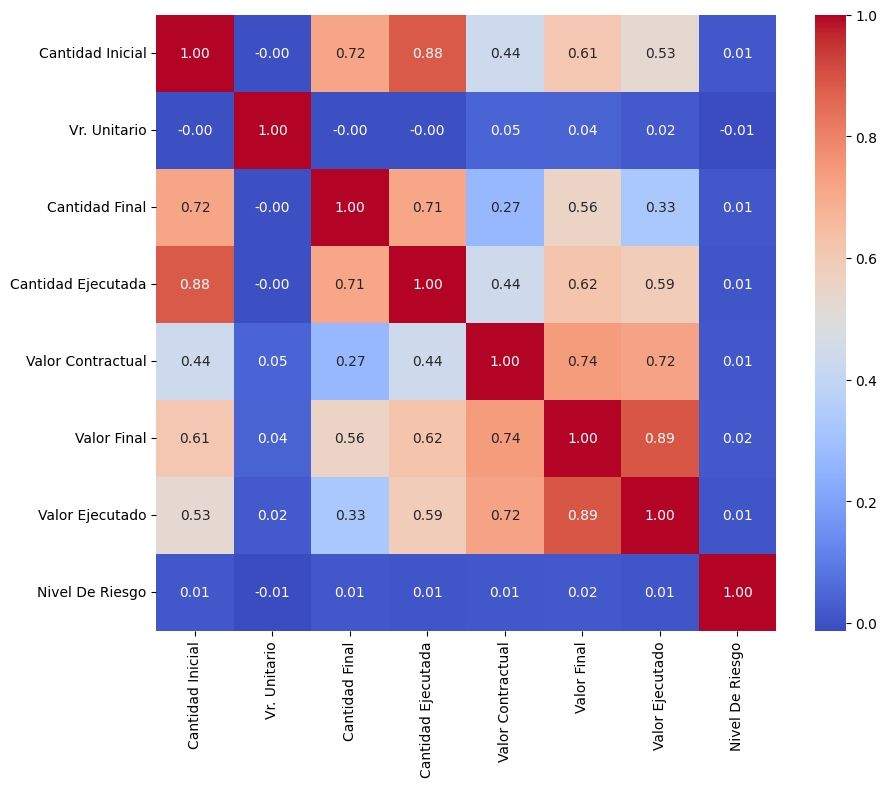

In [22]:
# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Mostrar el gráfico
plt.show()

In [23]:
# Limpiar los nombres de las columnas eliminando espacios y convirtiéndolos a minúsculas con mayúscula inicial
df_final.columns = df_final.columns.str.strip().str.title()

# Verificar los nuevos nombres de las columnas
print(df_final.columns)


Index(['Id Proyecto', 'Item', 'Descripción', 'Unidad', 'Cantidad Inicial',
       'Vr. Unitario', 'Cantidad Final', 'Cantidad Ejecutada', 'Categoria',
       'Proyecto', 'Firma_Inicio', 'Firma_Fin', 'Entidad',
       'Proyecto Nombre Corto', 'Latitud, Longitud', 'Departamento', 'Ciudad',
       'Valor Contractual', 'Valor Final', 'Valor Ejecutado',
       'Nivel De Riesgo'],
      dtype='object')


In [24]:
# Definir la ruta de la carpeta en Google Drive
ruta_archivo = '/content/drive/MyDrive/IBERO/Especialización Big Data/Opción de grado/Data Warehouse/df_final.csv'

# Exportar el DataFrame a un archivo CSV
df_final.to_csv(ruta_archivo, index=False)
df_final.to_excel('/content/drive/MyDrive/IBERO/Especialización Big Data/Opción de grado/Data Warehouse/df_final.xlsx')

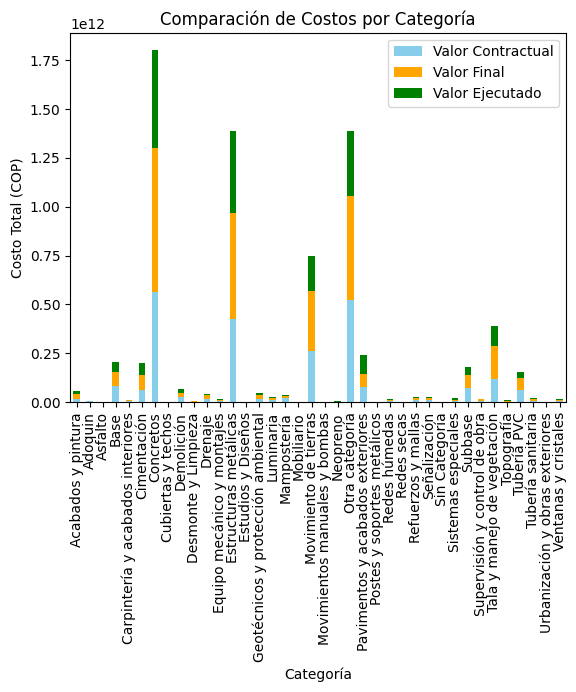

In [29]:
# Agrupar por Categoria y calcular la suma de los valores financieros
df_costs = df_final.groupby('Categoria')[['Valor Contractual', 'Valor Final', 'Valor Ejecutado']].sum().reset_index()

# Graficar
df_costs.plot(kind='bar', x='Categoria', stacked=True, color=['skyblue', 'orange', 'green'])
plt.title('Comparación de Costos por Categoría')
plt.ylabel('Costo Total (COP)')
plt.xlabel('Categoría')
plt.legend(['Valor Contractual', 'Valor Final', 'Valor Ejecutado'])
plt.show()

In [40]:
import folium

# Dividir la columna 'Latitud, Longitud' en dos columnas separadas: 'Latitud' y 'Longitud'
df_final[['Latitud', 'Longitud']] = df_final['Latitud, Longitud'].str.split(',', expand=True).astype(float)

# Calcular el costo ejecutado total por departamento
df_dept = df_final.groupby('Departamento')['Valor Final'].sum().reset_index()

# Crear un mapa centrado en Colombia
mapa_colombia = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Añadir el costo por departamento como capas en el mapa
for _, row in df_final.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=10,
        popup=f"{row['Departamento']}: COP {row['Valor Final']:,}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(mapa_colombia)

# Guardar el mapa en Google Drive
mapa_colombia.save('/content/drive/MyDrive/IBERO/Especialización Big Data/Opción de grado/Data Lake/mapa_colombia.html')

print("Mapa guardado como mapa_colombia.html")


Mapa guardado como mapa_colombia.html


<ipython-input-35-4eeed5bcb250>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='Costo Unitario Promedio', data=df_unit_cost, palette='viridis')


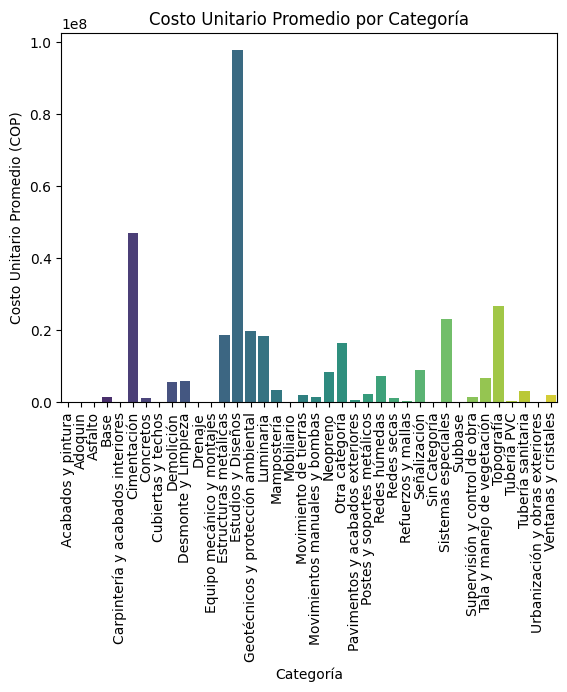

In [35]:
# Costo unitario promedio por categoría
df_final['Costo Unitario Promedio'] = df_final['Valor Ejecutado'] / df_final['Cantidad Ejecutada']
df_unit_cost = df_final.groupby('Categoria')['Costo Unitario Promedio'].mean().reset_index()

# Graficar
sns.barplot(x='Categoria', y='Costo Unitario Promedio', data=df_unit_cost, palette='viridis')
plt.xticks(rotation=90)
plt.title('Costo Unitario Promedio por Categoría')
plt.ylabel('Costo Unitario Promedio (COP)')
plt.xlabel('Categoría')
plt.show()

<ipython-input-38-429dc7163cd2>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajusta la posición para evitar que la leyenda se salga


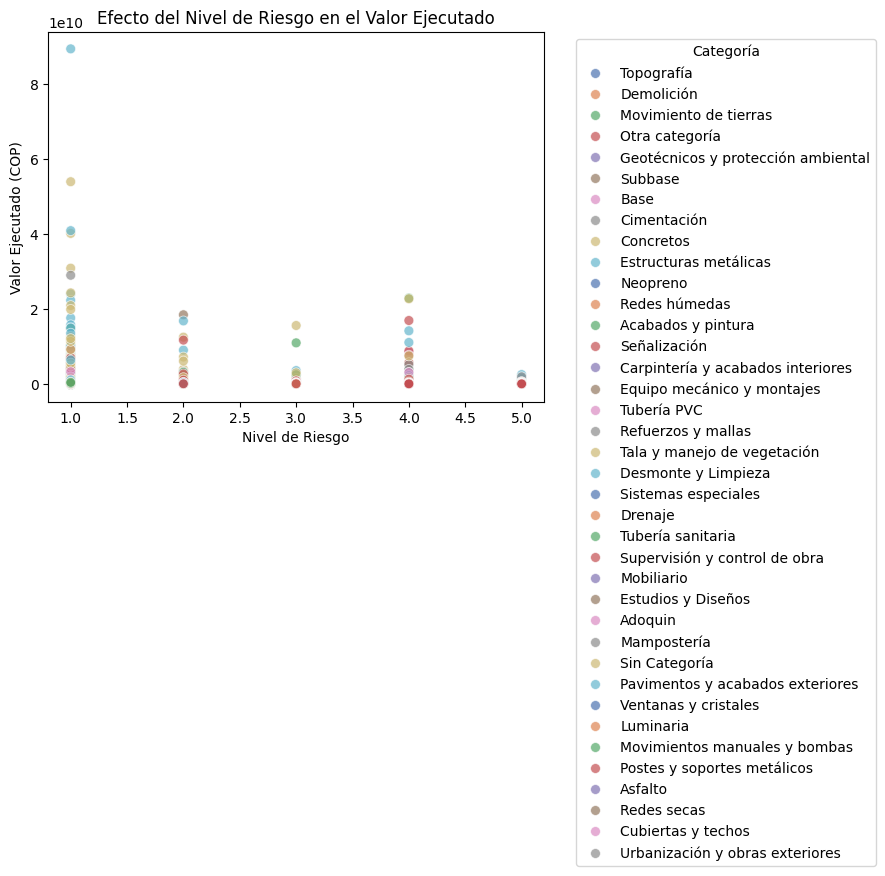

In [38]:
# Reducir el tamaño de los puntos y ajustar la leyenda
sns.scatterplot(x='Nivel De Riesgo', y='Valor Ejecutado', hue='Categoria', data=df_final, palette='deep', s=50, alpha=0.7)

# Título y etiquetas
plt.title('Efecto del Nivel de Riesgo en el Valor Ejecutado')
plt.ylabel('Valor Ejecutado (COP)')
plt.xlabel('Nivel de Riesgo')

# Ajustar la leyenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Categoría')

# Mostrar gráfico
plt.tight_layout()  # Ajusta la posición para evitar que la leyenda se salga
plt.show()

<ipython-input-41-3a71e9b8437d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Proyecto', y='Valor Ejecutado', data=df_project, palette='coolwarm')


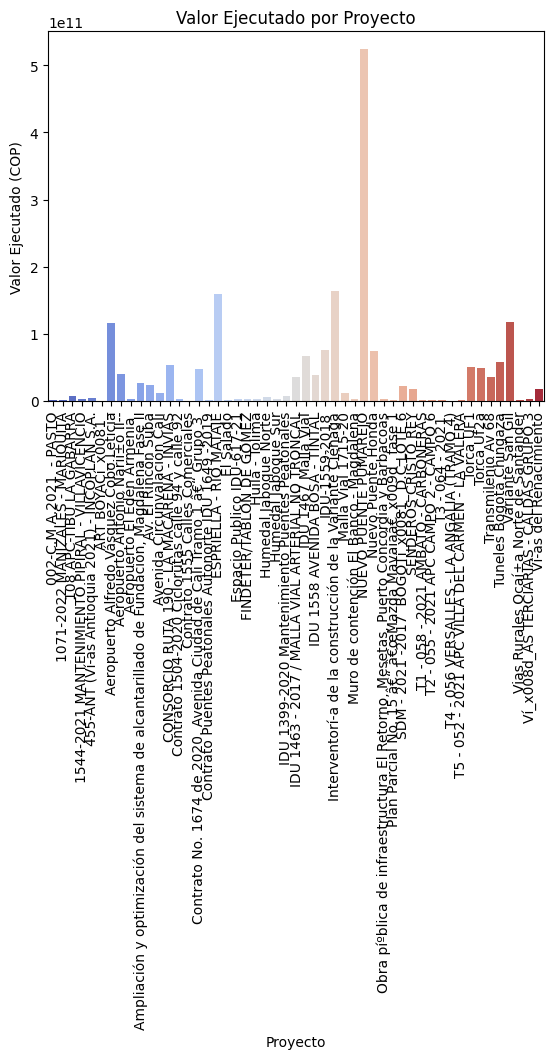

In [41]:
# Calcular el total de Valor Ejecutado por Proyecto
df_project = df_final.groupby('Proyecto')['Valor Ejecutado'].sum().reset_index()

# Graficar
sns.barplot(x='Proyecto', y='Valor Ejecutado', data=df_project, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Valor Ejecutado por Proyecto')
plt.ylabel('Valor Ejecutado (COP)')
plt.xlabel('Proyecto')
plt.show()


<ipython-input-44-f52cbfaa2d7a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Proyecto', y='Duración (días)', data=df_duration, palette='Set2')


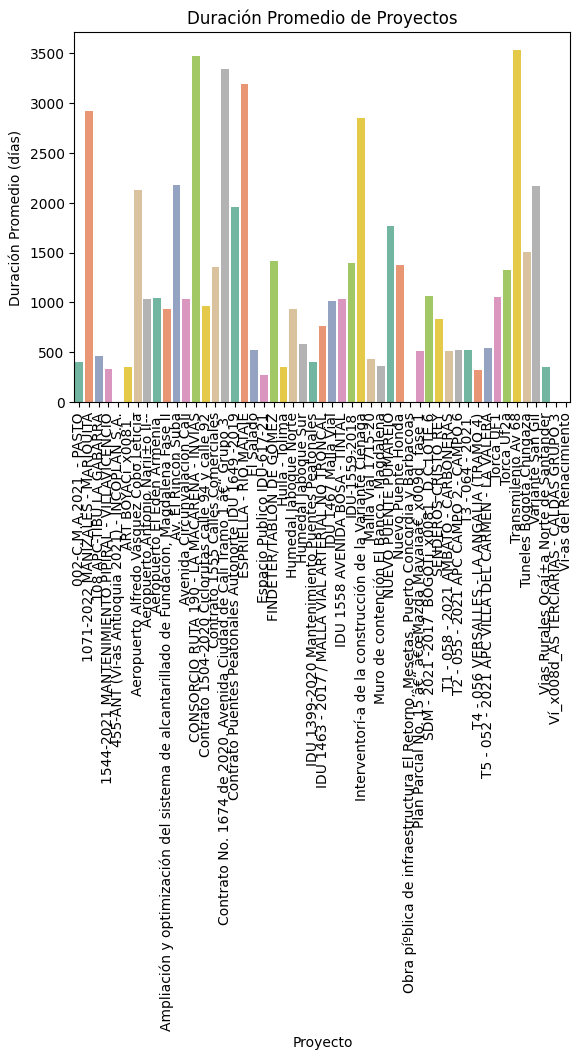

In [44]:
# Convertir las fechas a tipo datetime
df_final['Firma_Inicio'] = pd.to_datetime(df_final['Firma_Inicio'])
df_final['Firma_Fin'] = pd.to_datetime(df_final['Firma_Fin'])

# Calcular la duración de cada proyecto
df_final['Duración (días)'] = (df_final['Firma_Fin'] - df_final['Firma_Inicio']).dt.days

# Calcular la duración promedio por categoría
df_duration = df_final.groupby('Proyecto')['Duración (días)'].mean().reset_index()

# Graficar
sns.barplot(x='Proyecto', y='Duración (días)', data=df_duration, palette='Set2')
plt.xticks(rotation=90)
plt.title('Duración Promedio de Proyectos')
plt.ylabel('Duración Promedio (días)')
plt.xlabel('Proyecto')
plt.show()


<ipython-input-45-bdeb7a543a20>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ciudad', y='Valor Ejecutado', data=df_city, palette='Blues')


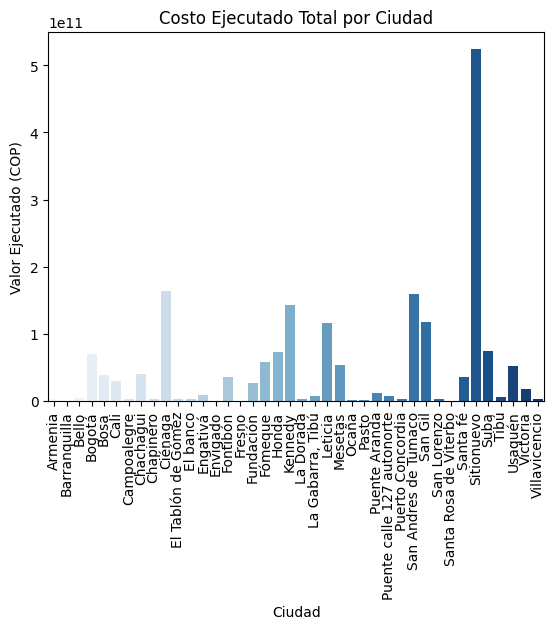

In [45]:
# Calcular el costo ejecutado total por ciudad
df_city = df_final.groupby('Ciudad')['Valor Ejecutado'].sum().reset_index()

# Graficar
sns.barplot(x='Ciudad', y='Valor Ejecutado', data=df_city, palette='Blues')
plt.xticks(rotation=90)
plt.title('Costo Ejecutado Total por Ciudad')
plt.ylabel('Valor Ejecutado (COP)')
plt.xlabel('Ciudad')
plt.show()


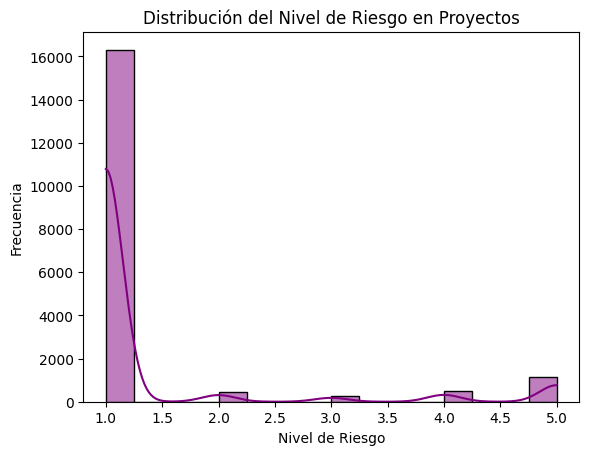

In [47]:
# Graficar la distribución del Nivel de Riesgo
sns.histplot(df_final['Nivel De Riesgo'], kde=True, color='purple')
plt.title('Distribución del Nivel de Riesgo en Proyectos')
plt.ylabel('Frecuencia')
plt.xlabel('Nivel de Riesgo')
plt.show()


In [54]:
# Estadísticas básicas de las columnas numéricas
estadisticas_basicas = df_final.describe()

# Imprimir las estadísticas básicas
print(estadisticas_basicas)


       Cantidad Inicial  Vr. Unitario  Cantidad Final  Cantidad Ejecutada  \
count      1.542500e+04  1.868200e+04    1.850400e+04        1.868600e+04   
mean       1.124318e+04  7.041052e+06    1.333566e+04        7.847984e+03   
std        2.820433e+05  7.349663e+07    5.789219e+05        2.427019e+05   
min        0.000000e+00  0.000000e+00   -3.694822e-13       -1.074180e+03   
25%        0.000000e+00  3.164850e+04    0.000000e+00        0.000000e+00   
50%        1.700000e+01  1.449900e+05    1.200000e+01        0.000000e+00   
75%        3.100000e+02  6.612160e+05    2.405175e+02        2.348250e+01   
max        2.194528e+07  2.864534e+09    7.019083e+07        2.740469e+07   

       Valor Contractual   Valor Final  Valor Ejecutado  Nivel De Riesgo  \
count       1.542500e+04  1.850400e+04     1.868200e+04     18686.000000   
mean        1.583672e+08  1.522589e+08     1.026707e+08         1.379107   
std         1.478127e+09  1.514615e+09     1.203178e+09         1.078518   
mi

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [62]:
media_valor_ejecutado = df_final['Valor Ejecutado'].mean()
print(f"Media de Valor Ejecutado: {media_valor_ejecutado}")


Media de Valor Ejecutado: 102670726.26766513
